# Исследование данных авиакомпании

Нужно изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

## Описание данных и постановка задачи

**Шаг 1.  Аналитика средствами Python**

**query_1.csv** — результат первого запроса:

- *model* — модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

**Шаг 2.  Проверка гипотезы средствами Python**

**query_last.csv** — результат последнего запроса:

- *week_number* — номер недели;
- *ticket_amount* — количество проданных билетов за неделю;
- *festival_week —* есть ли на этой неделе фестиваль;
- *festival_name —* название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

Поясните:

- Как вы формулировали нулевую и альтернативную гипотезы;
- Какой критерий использовали для проверки гипотез и почему.

# 1. Аналитика

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

##### Количество рейсов по моделям самолётов

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


+ Типы данных корректные
+ Пропусков нет

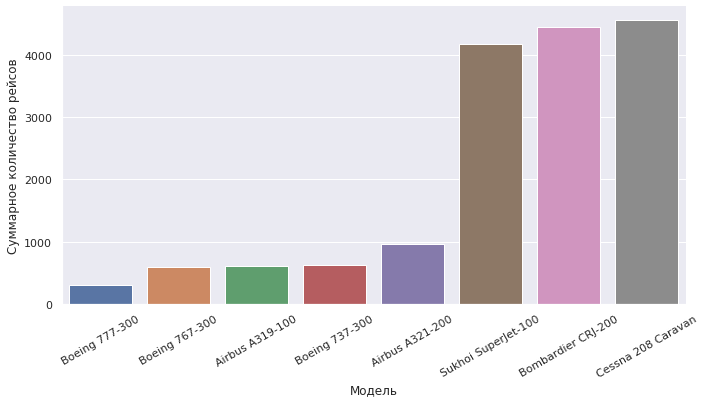

In [3]:
sns.set()
plot = sns.catplot(data=query_1.sort_values(by='flights_amount'),
                   x='model', y='flights_amount', kind='bar', height=5, aspect=2)

(plot.set_axis_labels("Модель", "Суммарное количество рейсов")
     .set_xticklabels(rotation=30))

+ В тройке лидеров с большим отрывом распологаются самолёты с небольшой пассажировместимостью (от 18 у Cessna 208 Caravan до 108 у Sukhoi Superjet-100)
+ В хвосте находятся самолёты с большей пассажировместимостью от 150 до 500 человек
+ В целом закономерно: вместительных самолётов меньше, летают реже и на большие расстояния, соответственно и количество рейсов у них меньше.

##### Среднесуточное количество рейсов по городам

In [4]:
query_3 = pd.read_csv('/datasets/query_3.csv')
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


+ Типы данных корректные
+ Пропусков нет

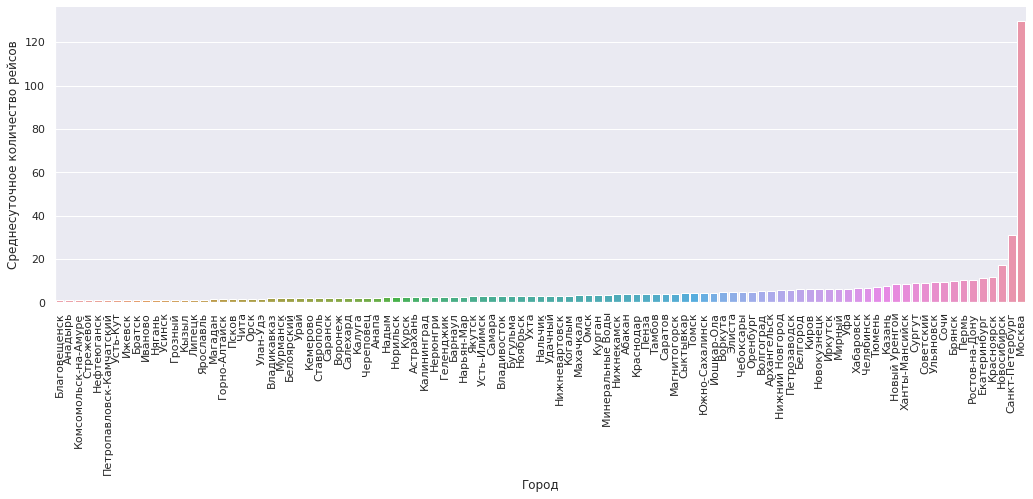

In [5]:
plot = sns.catplot(data=query_3.sort_values(by='average_flights'),
                   x='city', y='average_flights', kind='bar', height=5, aspect=3)

(plot.set_axis_labels("Город", "Среднесуточное количество рейсов")
     .set_xticklabels(rotation=90))

+ Огромный разброс значений от 1 рейса у ряда городов (Анадырь, Благовещенск и др.) до почти 130 в Москве.
+ График подчёркивает неравномерность расселения людей по стране и неравномерность экономического развития.

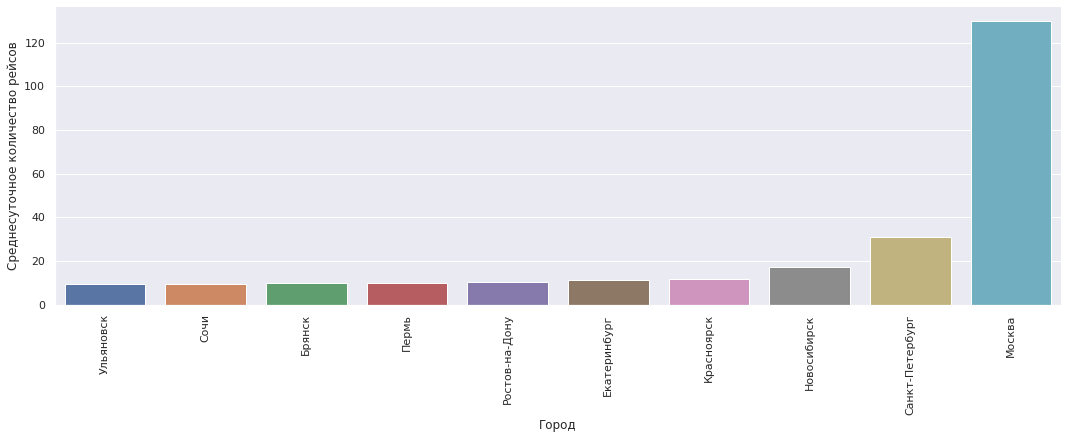

In [6]:
plot = sns.catplot(data=query_3.sort_values(by='average_flights').tail(10),
                   x='city', y='average_flights', kind='bar', height=5, aspect=3)

(plot.set_axis_labels("Город", "Среднесуточное количество рейсов")
     .set_xticklabels(rotation=90))

+ В топ-3 входят города, входящие в топ-3 по количеству жителей. Ну а дальше по рейтингу уже не так всё однозначно. Пожалуй лидируют туристически и экономически значимые центры.

##### Количество проданных билетов

In [7]:
query_last = pd.read_csv('/datasets/query_last.csv')
query_last.info()
query_last

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


+ Типы данных корректные
+ Пропуски расположены в столбцах __'festival_week'__ и __'festival_name'__, отражают отсутствие фестивалей в соответствующую неделю

# 2. Проверка гипотезы

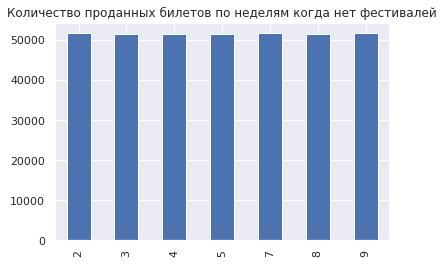

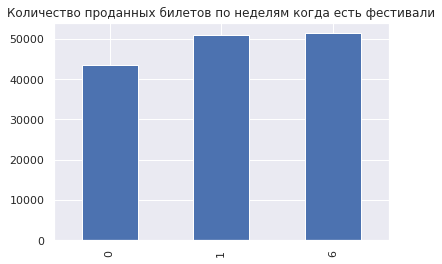

In [8]:
weeks_without_fest = query_last[query_last['festival_week'].isna() == True]
weeks_with_fest = query_last[query_last['festival_week'].isna() == False]

weeks_without_fest['ticket_amount'].plot(kind='bar', 
                       title='Количество проданных билетов по неделям когда нет фестивалей')

plt.show()

weeks_with_fest['ticket_amount'].plot(kind='bar', 
                                      title='Количество проданных билетов по неделям когда есть фестивали')

+ Имеем две выборки с малым количеством наблюдений (3 и 7)
+ Распределение похоже на равномерное

##### Можно ли считать околоравномерное распределение нормальным?

        Критерий Шапиро-Уилка

In [9]:
alpha = .05
stat, p_value = st.shapiro(weeks_without_fest['ticket_amount'])

print('p-значение:', p_value)

if (p_value > alpha):
    print("Принять гипотезу о нормальности")
else:
    print("Отклонить гипотезу о нормальности")

p-значение: 0.29630061984062195
Принять гипотезу о нормальности


In [10]:
alpha = .05
stat, p_value = st.shapiro(weeks_with_fest['ticket_amount'])

print('p-значение:', p_value)

if (p_value > alpha):
    print("Принять гипотезу о нормальности")
else:
    print("Отклонить гипотезу о нормальности")

p-значение: 0.07614270597696304
Принять гипотезу о нормальности


        Критерий согласия Пирсона

In [11]:
#alpha = .05
#stat, p_value = st.normaltest(weeks_without_fest['ticket_amount'])

#print('p-значение:', p_value)

#if (p_value > alpha):
#    print("Принять гипотезу о нормальности")
#else:
#    print("Отклонить гипотезу о нормальности")

ValueError: skewtest is not valid with less than 8 samples; 7 samples were given.

+ Оба критерия некорректно использовать ввиду малых выборок (в случае критерия Пирсона, даже python об этом предупреждает)

##### T-критерий Стьюдента

Имеем две независимые выборки с малым количеством наблюдений, имеющие ненормальное распределение. Хуже не придумаешь.
На мой взгляд было бы корректнее испльдовать U-критерий Мана-Уитни, но в документации scypy указано, что его можно использовать только при количестве наблюдений больше 20.  
Ввиду вышеупомянутого не остаётся ничего лучше, как использовать T-критерий Стьюдента.

$H_0$ - средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время  
$H_1$ - средний спрос отличается

In [12]:
mean_usual = weeks_without_fest['ticket_amount'].mean()
mean_fest = weeks_with_fest['ticket_amount'].mean()

In [13]:
print('Средний спрос в обычное время: {:.2f}'.format(mean_usual))
print('Средний спрос во время фестивалей: {:.2f}'.format(mean_fest))
print()
      
alpha = .05
results = st.ttest_ind(
    weeks_without_fest['ticket_amount'],
    weeks_with_fest['ticket_amount'],
    equal_var=False)
      
print('p-значение:', results.pvalue)
      
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний спрос в обычное время: 51530.86
Средний спрос во время фестивалей: 48662.67

p-значение: 0.377432493172683
Не получилось отвергнуть нулевую гипотезу


Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

##### U-критерий Манна-Уитни

In [14]:
alpha = .05

results = st.mannwhitneyu(
    weeks_without_fest['ticket_amount'],
    weeks_with_fest['ticket_amount'],
    alternative='two-sided')

print('p-значение:', results.pvalue)
      
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.06824748837800128
Не получилось отвергнуть нулевую гипотезу


Вывод получается аналогичный. Однако p-value уже на грани.

##### Метод пристального взгляда

При взгляде на полученные данные складывается впечатление, что недели с фетивалями и недели без фестивалей не шибко отличаются друг от друга по количеству проданных билетов.

Статистические методы это здорово, но чтобы делать достоверныек выводы эту статистику нужно набрать.

# Вывод

+ Самолёты менее вместительных моделей совершают значительно большее количество рейсов.
+ Абсолютным лидером по среднесуточному количеству рейсов является Москва (~130), лидирующая с большим отрывом.
+ Для формирования достоверного вывода о различии спроса на билеты во время фестивалей и в обычное время не достаточно информации. Необходимо получить больше данных.